In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pricing_functions import data_treatment, request, product_pricing
from ys_functions import *

In [54]:
product_database = {}
weeks = 36
all_df = pd.DataFrame([])
all_jsons = []

for week in range(weeks):
    json = request()
    json = data_treatment(request())
    json, product_database = product_pricing(json, product_database)
    all_jsons.append(json)

#### Dataframe - Quantity of products

In [55]:
all_qnt= df_to_analysis(all_jsons=all_jsons, column_name='qnt')
all_qnt.head(10)

,date,week,month,id,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
0,2034-02-22,Week 1,February,lamyhpq0novrsc4lezs,47.0,47.0,44.0,34.0,27.0,45.645231,57.0,325.519198,4407.617754,0.0,0.0,0.000000,0.0,5303.798626
1,2034-02-22,Week 1,February,lamyhpq0ml5kiya9wtn,25.0,26.0,23.0,0.0,0.0,596.246183,525.0,468.221900,4200.752724,45.0,0.0,0.000000,0.0,5303.798626
2,2034-02-22,Week 1,February,lamyhpq0nu0tqc00kv,10.0,0.0,0.0,21.0,6.0,36.840338,353.0,0.000000,3992.306000,0.0,17.0,394.055842,0.0,5303.798626
3,2034-02-22,Week 1,February,lamyhpq1wn0vn4926f,0.0,49.0,16.0,0.0,0.0,36.581744,399.0,672.240981,4220.568240,0.0,0.0,0.000000,17.0,5303.798626
4,2034-02-23,Week 1,February,lamyhpq1isbo6cybmp,0.0,1.0,21.0,21.0,10.0,99.617057,297.0,0.000000,4241.063649,4.0,13.0,256.417878,2.0,5303.798626
5,2034-02-23,Week 1,February,lamyhpq1ic9yqluvlz,10.0,23.0,19.0,0.0,0.0,228.525044,749.0,257.640268,4589.576755,29.0,34.0,0.000000,48.0,5303.798626
6,2034-02-23,Week 1,February,lamyhpq1icm08ubjw4a,47.0,0.0,10.0,1.0,33.0,23.956243,673.0,82.838941,4424.223150,0.0,42.0,743.151441,0.0,5303.798626
7,2034-02-22,Week 1,February,lamyhpq10e67ey2945wu,0.0,0.0,11.0,14.0,0.0,418.272344,39.0,639.121866,4647.949956,0.0,0.0,0.000000,18.0,5303.798626
8,2034-02-22,Week 1,February,lamyhpq14dr3cxhzd0s,0.0,0.0,0.0,0.0,10.0,234.261831,0.0,36.431703,4375.971962,0.0,0.0,0.000000,8.0,5303.798626
9,2034-03-08,Week 2,March,lamyhprcqpl1xbrz4z,23.0,28.0,0.0,0.0,0.0,610.457616,790.0,283.217865,4293.340263,30.0,21.0,276.698311,31.0,5303.798626


In [56]:
sum_all_prods = {f'{x}':'sum' for x in all_qnt.columns[4:]}

#### Grouping - Quantity - Week

In [57]:
weekly_qnt= all_qnt.groupby('week', sort=False).agg(sum_all_prods)
weekly_qnt.head()

,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
week,,,,,,,,,,,,,,
Week 1,139.0,146.0,144.0,91.0,86.0,1719.946015,3092.0,2482.014857,39100.030189,78.0,106.0,1393.625161,93.0,47734.187638
Week 2,387.0,395.0,285.0,303.0,366.0,6543.874059,5059.0,4675.375314,134684.061425,348.0,263.0,6897.428295,337.0,164417.757419
Week 3,142.0,177.0,289.0,186.0,107.0,3582.586181,2276.0,2614.306988,72390.907882,183.0,235.0,3854.030191,160.0,84860.778023
Week 4,195.0,170.0,297.0,195.0,248.0,5697.703423,3319.0,4410.368935,108739.996179,235.0,276.0,5109.548487,225.0,121987.368407
Week 5,56.0,133.0,102.0,81.0,58.0,841.268234,1138.0,1227.568656,30370.992154,80.0,34.0,1489.989118,58.0,31822.791758


#### Grouping - Quantity - Month

In [58]:
monthly_qnt= all_qnt.groupby('month', sort=False).agg(sum_all_prods)
monthly_qnt.head()

,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
month,,,,,,,,,,,,,,
February,664.0,695.0,615.0,505.0,500.0,10369.528543,12753.0,12155.024208,223916.785926,420.0,727.0,11895.799218,561.0,254582.334068
March,985.0,1023.0,1098.0,818.0,937.0,18762.854367,17404.0,14060.599647,432099.167153,1098.0,1056.0,22072.549503,856.0,477341.876377
April,625.0,656.0,855.0,587.0,551.0,12348.404982,9818.0,12287.693616,286930.968644,521.0,465.0,13824.442509,468.0,291708.924453
May,1347.0,1224.0,1171.0,1312.0,1546.0,25680.173328,21300.0,22285.874668,538224.232562,1248.0,1240.0,20463.722980,1200.0,525076.064015
June,1192.0,1319.0,1286.0,1177.0,1435.0,18425.557211,24429.0,18717.465322,501345.688925,1502.0,1193.0,16529.343597,1449.0,514468.466762


In [59]:
monthly_qnt.to_csv('monthly_revenue.csv')

#### DataFrame - Product Price

In [60]:
all_prices= df_to_analysis(all_jsons=all_jsons, column_name='price')
all_prices.head()

,date,week,month,id,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
0,2034-02-22,Week 1,February,lamyhpq0novrsc4lezs,29.27,1.75,37.01,92.3,81.06,32.75,50.81,65.45,94.18,0.00,0.00,0.00,0.00,3.104157e+08
1,2034-02-22,Week 1,February,lamyhpq0ml5kiya9wtn,29.27,1.75,37.01,0.0,0.00,32.75,50.81,65.45,94.18,59.15,0.00,0.00,0.00,3.104157e+08
2,2034-02-22,Week 1,February,lamyhpq0nu0tqc00kv,29.27,0.00,0.00,92.3,81.06,32.75,50.81,0.00,94.18,0.00,22.37,95.92,0.00,3.104157e+08
3,2034-02-22,Week 1,February,lamyhpq1wn0vn4926f,0.00,1.75,37.01,0.0,0.00,32.75,50.81,65.45,94.18,0.00,0.00,0.00,38.22,3.104157e+08
4,2034-02-23,Week 1,February,lamyhpq1isbo6cybmp,0.00,1.75,37.01,92.3,81.06,32.75,50.81,0.00,94.18,59.15,22.37,95.92,38.22,3.104157e+08


In [61]:
all_prices.to_csv('all_prices.csv')

#### Grouping - Price - Week

In [62]:
weekly_price= all_prices.groupby('week', sort=False).agg(sum_all_prods)
weekly_price.head()

,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
week,,,,,,,,,,,,,,
Week 1,146.35000,8.7500,259.070000,461.500000,405.300000,294.7500,406.48000,458.15000,847.620,177.45000,89.4800,287.76,191.100000,2.793742e+09
Week 2,497.59000,26.2500,481.130000,1292.200000,1053.780000,622.2500,1219.44000,719.95000,2919.580,887.25000,223.7000,1726.56,496.860000,9.622888e+09
Week 3,263.43000,18.3750,555.150000,969.149999,729.540000,491.2500,914.58000,687.22500,2260.320,621.07500,301.9950,1151.04,286.650000,4.966652e+09
Week 4,526.86000,27.5625,1082.542499,1869.074999,2371.004923,1105.3125,1714.83750,1472.62500,4873.815,1197.78750,503.3250,2589.84,945.945000,7.139562e+09
Week 5,296.35875,23.6250,374.726250,623.024999,547.154977,663.1875,857.41875,662.68125,1907.145,598.89375,150.9975,1294.92,515.969999,1.862494e+09


#### Grouping - Price - Month

In [63]:
monthly_price=all_prices.groupby('month').agg(sum_all_prods)
monthly_price.head()

,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
month,,,,,,,,,,,,,,
April,4.490121e+07,553984.772225,6.308324e+07,1.454071e+08,8.289345e+07,7.396441e+07,1.169170e+08,1.199254e+08,2.809263e+08,7.295836e+07,2.192462e+07,3.911527e+07,4.396983e+07,1.707287e+10
August,2.531783e+04,2043.504764,5.602231e+04,1.357233e+05,8.764317e+04,4.815752e+04,8.350388e+04,9.907214e+04,2.362439e+05,7.930312e+04,3.579658e+04,1.576401e+05,5.454790e+04,8.381225e+09
December,2.384591e+06,28818.167511,2.461355e+06,7.668369e+06,6.738041e+06,3.757124e+06,6.842730e+06,6.311504e+06,1.503229e+07,5.398822e+06,1.822457e+06,1.635070e+06,3.431462e+06,1.210621e+10
February,1.453581e+07,175742.262888,1.432996e+07,3.882158e+07,3.342951e+07,2.150166e+07,3.592474e+07,2.313810e+07,7.847996e+07,1.788991e+07,9.791145e+06,1.122096e+07,1.640687e+07,1.489996e+10
January,8.212240e+06,97261.315348,8.445524e+06,2.001444e+07,1.910235e+07,1.004622e+07,1.862743e+07,8.324656e+06,4.122135e+07,1.303079e+07,4.351580e+06,6.458526e+06,9.436521e+06,1.396871e+10


#### Consolidate (Price x Quantity)

#### Consolidate - Week

In [64]:
df_consolidate_week = pd.DataFrame([])
df_consolidate_week = consolidate(weekly_qnt, weekly_price, df_consolidate_week)
df_consolidate_week.head()

,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
week,,,,,,,,,,,,,,
Week 1,20342.650000,1277.500,37306.080000,41996.500000,34855.800000,5.069541e+05,1.256836e+06,1.137135e+06,3.314197e+07,13841.100000,9484.880000,4.010296e+05,17772.300000,1.333570e+14
Week 2,192567.330000,10368.750,137122.050000,391536.600000,385683.480000,4.071926e+06,6.169147e+06,3.366036e+06,3.932209e+08,308763.000000,58833.100000,1.190882e+07,167441.820000,1.582174e+15
Week 3,37407.059991,3252.375,160438.349912,180261.899870,78060.780000,1.759945e+06,2.081584e+06,1.796617e+06,1.636266e+08,113656.724983,70968.825000,4.436143e+06,45864.000000,4.214739e+14
Week 4,102737.699966,4685.625,321515.122324,364469.624735,588009.220827,6.297743e+06,5.691546e+06,6.494820e+06,5.299786e+08,281480.062455,138917.699998,1.323291e+07,212837.624998,8.709364e+14
Week 5,16596.089994,3142.125,38222.077471,50465.024928,31734.988667,5.579186e+05,9.757425e+05,8.134867e+05,5.792189e+07,47911.499992,5133.915000,1.929417e+06,29926.259929,5.926977e+13


#### Consolidate - Month

In [65]:
df_consolidate_month = pd.DataFrame([])
df_consolidate_month= consolidate(monthly_qnt, monthly_price, df_consolidate_month)
df_consolidate_month.head()

,prod_1,prod_2,prod_3,prod_4,prod_7,prod_9,prod_8,prod_10,prod_15,prod_5,prod_0,prod_11,prod_6,balance
month,,,,,,,,,,,,,,
April,2.806326e+10,3.634140e+08,5.393617e+10,8.535395e+10,4.567429e+10,9.133425e+11,1.147891e+12,1.473606e+12,8.060647e+13,3.801131e+10,1.019495e+10,5.407468e+11,2.057788e+10,4.980307e+15
August,7.418126e+06,5.006587e+05,2.705877e+07,5.591800e+07,2.515359e+07,2.014630e+08,5.158035e+08,6.008917e+08,2.897570e+10,3.695526e+07,1.575049e+07,1.223991e+09,2.209190e+07,1.200213e+15
December,1.208988e+09,1.746381e+07,9.082399e+08,3.910868e+09,3.375758e+09,3.805262e+10,6.721614e+10,6.320516e+10,2.968277e+12,3.125918e+09,8.529097e+08,1.122895e+10,1.650533e+09,2.504148e+15
February,9.651779e+09,1.221409e+08,8.812925e+09,1.960490e+10,1.671475e+10,2.229621e+11,4.581482e+11,2.812442e+11,1.757298e+13,7.513763e+09,7.118162e+09,1.334822e+11,9.204254e+09,3.793265e+15
January,5.337956e+09,5.670335e+07,5.514927e+09,1.124812e+10,9.379252e+09,9.409925e+10,1.922723e+11,4.421652e+10,8.691052e+12,6.554489e+09,2.106165e+09,7.876628e+10,4.925864e+09,3.333925e+15


In [66]:
df_consolidate_month.to_csv('df_consolidate_month.csv')

#### Consolidate to Dashboard

In [67]:
final_consolidate = df_consolidate_month.T
final_consolidate['balance'] = balance_product(final_consolidate)
final_consolidate.drop('balance', inplace=True)
final_consolidate = final_consolidate.reset_index()
final_consolidate.rename(columns={'index':'product'}, inplace=True)
final_consolidate.to_csv('final_consolidate.csv')

In [68]:
final_consolidate.head()

month,product,April,August,December,February,January,July,June,March,May,November,October,September,balance
0,prod_1,2.806326e+10,7.418126e+06,1.208988e+09,9.651779e+09,5.337956e+09,1.066950e+07,4.741836e+11,2.948534e+10,3.610015e+11,6.206066e+08,5.781818e+07,5.875668e+07,9.096878e+11
1,prod_2,3.634140e+08,5.006587e+05,1.746381e+07,1.221409e+08,5.670335e+07,4.620507e+05,1.025674e+10,2.976926e+08,3.975949e+09,2.743749e+07,5.525124e+06,2.250514e+06,1.512628e+10
2,prod_3,5.393617e+10,2.705877e+07,9.082399e+08,8.812925e+09,5.514927e+09,9.407479e+06,9.856656e+11,5.002500e+10,4.342148e+11,9.052499e+08,1.053095e+08,5.769497e+07,1.540182e+12
3,prod_4,8.535395e+10,5.591800e+07,3.910868e+09,1.960490e+10,1.124812e+10,3.280601e+07,1.826477e+12,6.716509e+10,1.183287e+12,2.391350e+09,4.998640e+08,1.302272e+08,3.200157e+12
4,prod_7,4.567429e+10,2.515359e+07,3.375758e+09,1.671475e+10,9.379252e+09,2.924259e+07,2.371117e+12,6.472536e+10,1.405650e+12,1.929935e+09,4.159019e+08,2.566191e+08,3.919294e+12


#### Dict of DataFrames

In [69]:
dict_dfs = {'week':{'price':weekly_price,'qnt':weekly_qnt, 'consolidate':df_consolidate_week}, \
    'month':{'price':monthly_price,'qnt':monthly_qnt, 'consolidate':df_consolidate_month}}

#### Analysis

##### Monthly Quantities

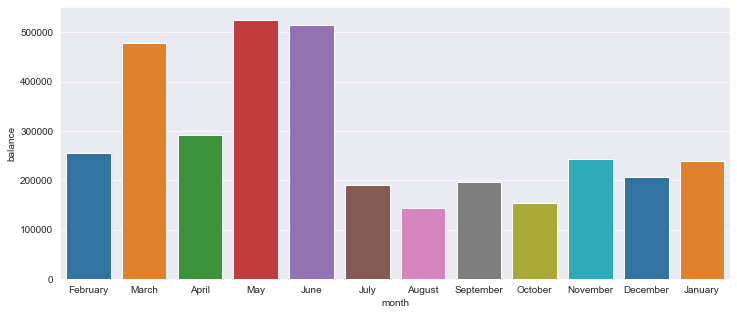

In [70]:
print_barplot(x=monthly_qnt.index, y=monthly_qnt['balance'])

In [71]:
week_per_month = all_qnt.groupby(['month', 'week']).agg({'balance':'sum'})
week_per_month.head()

balance
month  week                  
April  Week 30   42430.389011
       Week 31   95468.375275
       Week 4   121987.368407
       Week 5    31822.791758
August Week 13  121987.368407

#### Quantity of requests on the months with maximum and minimum balance

In [72]:
min_month = monthly_qnt['balance'].min()
min_month = monthly_qnt[monthly_qnt['balance']==min_month].index[0]
max_month = monthly_qnt['balance'].max()
max_month = monthly_qnt[monthly_qnt['balance']==max_month].index[0]

In [73]:
min_weeks = len(week_per_month.loc[min_month,'balance'])
max_weeks = len(week_per_month.loc[max_month,'balance'])

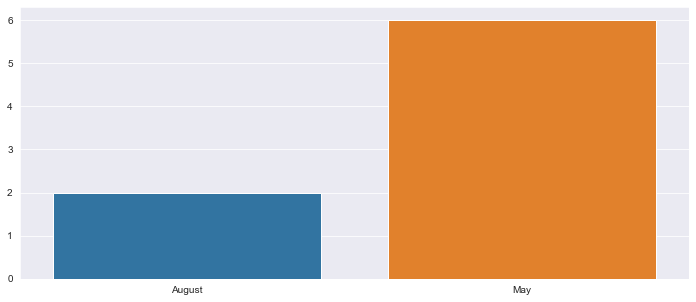

In [74]:
print_barplot(x=[min_month, max_month], y=[min_weeks,max_weeks])

##### Monthly Quantities per Request

In [90]:
qnt_ratios = join_all_ratios(all_prices=all_prices, monthly_price=monthly_price,dict_dfs=dict_dfs, period='month', variable='qnt', report=True)
join_all_ratios(all_prices=all_prices, monthly_price=monthly_price, dict_dfs=dict_dfs, period='month', variable='qnt', report=False)

TypeError: join_all_ratios() got an unexpected keyword argument 'all_prices'

In [ ]:
price_ratios = join_all_ratios(dict_dfs=dict_dfs,period='month', variable='price', report=True)

TypeError: join_all_ratios() missing 1 required positional argument: 'monthly_price'

#### Consolidate (Price x Quantity) per Resquest

852862359544.9535


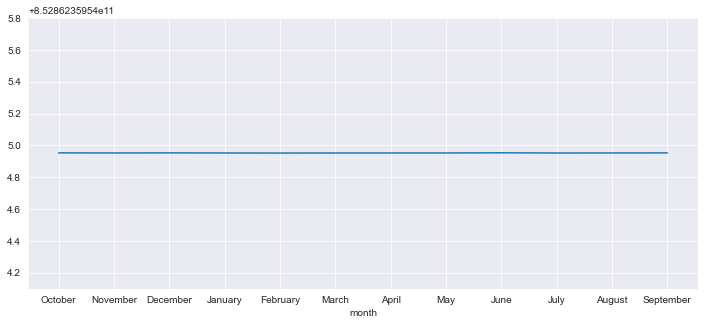

In [ ]:
consolidate_per_transaction(dict_dfs=dict_dfs, period='month', qnt=qnt_ratios, price=price_ratios)

#### Semanas - Quantidade

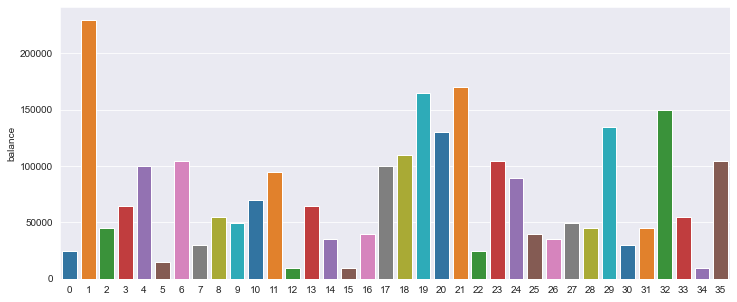

In [ ]:
print_barplot(x=[x for x in range(len(weekly_qnt.index))], y=weekly_qnt['balance'])

#### Semanas - Montante 

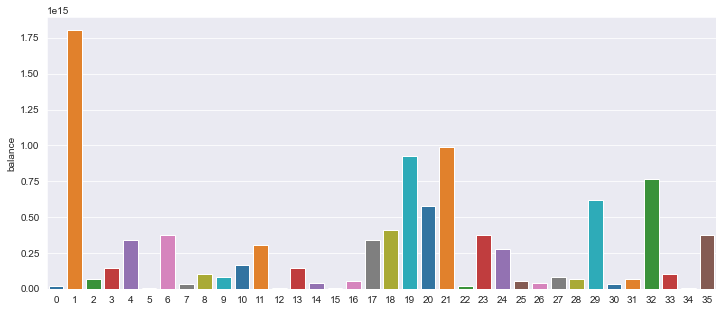

In [ ]:
print_barplot(x=[x for x in range(len(df_consolidate_week.index))], y=df_consolidate_week['balance'])

##### Qual categoria de produtos foi mais vendido?

In [ ]:
monthly_qnt_to_compare = monthly_qnt.T
monthly_qnt_to_compare=monthly_qnt_to_compare.drop('balance')
prods_type=['unity' if (str(monthly_qnt_to_compare.loc[prod, monthly_qnt_to_compare.columns[0]]).split('.')[1]=='0') else 'kg' \
    for prod in monthly_qnt_to_compare.index]

,October,November,December,January,February,March,April,May,June,July,August,September,balance
type,,,,,,,,,,,,,
kg,313246.873563,329567.710992,490291.892392,163672.69805,224927.983285,99946.875155,92751.291285,51006.799229,430162.622499,331356.522878,126979.199868,130856.233057,2.784767e+06
unity,19278.000000,17799.000000,31762.000000,10863.00000,12232.000000,5121.000000,4338.000000,2764.000000,23319.000000,24683.000000,7010.000000,8683.000000,1.678520e+05


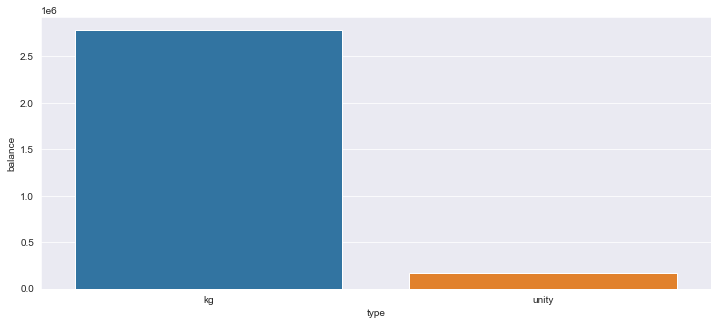

In [ ]:
barplot_type(df=monthly_qnt)

#### Qual categoria de produto obteve maior valor em vendas?

,April,August,December,February,January,July,June,March,May,November,October,September,balance
type,,,,,,,,,,,,,
kg,226535.159762,5.990427e+06,3.569692e+08,6.546464e+08,1.869284e+08,6.150672e+06,2.844436e+06,50807.800942,147292.109385,1.042328e+08,1.743433e+07,1.117111e+07,1.346792e+09
unity,358759.739309,2.015407e+07,1.371748e+09,2.718382e+09,7.064498e+08,2.268004e+07,1.091380e+07,186053.096279,484372.716353,3.874344e+08,6.744390e+07,4.057778e+07,5.346813e+09


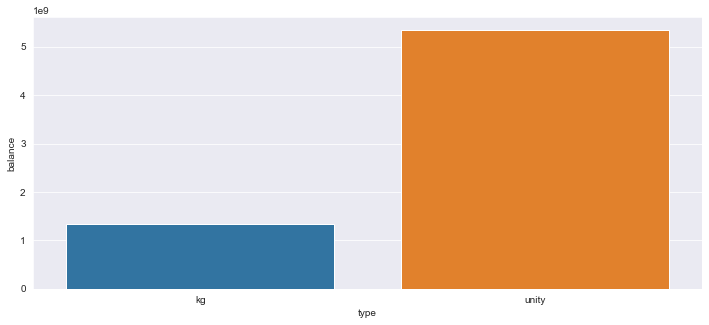

In [ ]:
barplot_type(df=monthly_price)

,April,August,December,February,January,July,June,March,May,November,October,September,balance
type,,,,,,,,,,,,,
kg,4.730489e+09,3.539984e+11,7.955366e+13,7.003340e+13,1.500516e+13,8.706998e+11,5.502266e+11,1.908496e+09,3.195224e+09,1.586230e+13,2.635344e+12,6.553476e+11,1.855300e+14
unity,4.930930e+08,4.411337e+10,1.825546e+13,1.124235e+13,2.734851e+12,2.317741e+11,9.303383e+10,2.778989e+08,5.419354e+08,2.510007e+12,4.270228e+11,1.518335e+11,3.569175e+13


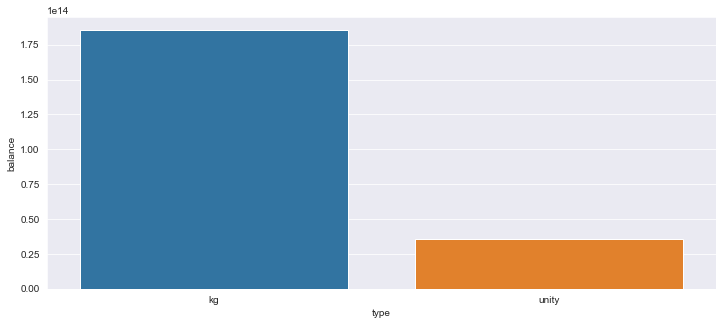

In [ ]:
barplot_type(df_consolidate_month)